<a href="https://colab.research.google.com/github/DanielKorenDataScience/ClassificationProject/blob/main/Shufersal_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification Project - SWEETS predict


for Shufersal on-line orders, for replacing of missing products, will predict the replacement success!

In [77]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display
p = print
d = display

# Get Data

## Raw Data

In [78]:
id = ''  # name of result file
prefix = 'Shufersal'

RAW = True
DIFF = True

In [79]:
def get_raw(fname, subdir=''):
  data_url = 'https://raw.githubusercontent.com/DanielKorenDataScience/ClassificationProject/main/' + subdir + fname
  resp = requests.get(data_url)
  text = resp.text
  
  if len(text) > 100:
    with open(fname, 'w') as fh:
      fh.write(text)

In [80]:
def diff_list(li1, li2):
  p(len(li1), len(li1))
  return [i for i in li1 + li2 if i not in li1 or i not in li2]

In [81]:
df1 = pd.read_csv('/content/drive/MyDrive/Sweets_ver2.csv', encoding='ISO-8859-8', nrows=1)
df1

,OrderNumbert,HouseHoldID,LocationCityName,QuarterNumber,MonthNumber,WeekNumber,DayNumberInWeek,PeriodHoliday,TransactionDate,DepartmentCode,DepartmentName,CategoryCode,CategoryName,GroupCode,GroupName,SubGroupCode,SubGroupName,CompoundID,CompoundIDDesc,ParentProductNumber,ProductDescription,BrandIndDesc,BrandName,VendorNumber,VendorName,UnitOfMeasure,ItemsPerPackageWH,DescriptionTavit,Price,Quantity,cntPrdAll,NetSaleAmountAll,NetSaleNoVatPrdLast3Months,QuantSale,cntMonths,DiscountPerUnit,isPromo,Energy,Pachmema,Natran,...,ShumanRavuy,ShumanTrans,Colastrol,SivimTzunatim,CafiotSucar,DepartmentCodeSubs,DepartmentNameSusb,CategoryCodeSubs,CategoryNameSubs,GroupCodeSubs,GroupNameSubs,SubGroupCodeSubs,SubGroupNameSubs,CompoundIDSubs,CompoundIDDescSubs,ProductNumberSubs,ProductDescriptionSubs,BrandIndDescSuss,BrandNameSubs,VendorNumberSubs,VendorNameSubs,UnitOfMeasureSubs,ItemsPerPackageWHSubs,DescriptionTavitSubs,PriceSubs,NetSaleNoVatPrdSubs,QuantSaleSubs,cntMonthsSubs,DiscountPerUnitSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSusb,CorrelateItemStatusCode
0,40052,1,ראשון לציון,202101,202102,202108,1,NotHoliday,2021-02-21,10,10-מזון יבש,6,מתוקים,700,חטיפים מתוקים,3,שקיות גדולות/קטנות,-8000500249352,205קינדר בואנו מיני מיקס,8000500249352,205קינדר בואנו מיני מיקס,קינדר,לא מותג פרטי,914547,פרימיום-חברה לדברי מתיקה,0.205,15,205 גרם,18.9,4,22,800.63,57747.16,0.8,16,NaN,noPromo,568,49.5,107,...,17.3,0.5,15,NaN,NaN,10,10-מזון יבש,6,מתוקים,700,חטיפים מתוקים,6,חטיפי ילדים,-8000500217740,קינדר בואנו מיני 86 גרם,8000500217740,קינדר בואנו מיני 86 גרם,קינדר,לא מותג פרטי,914547,פרימיום-חברה לדברי מתיקה,0.086,12,86 גרם,9.9,46128.25,0.8,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [82]:
if RAW:
  fname = 'Sweets_ver2.csv'
  get_raw(fname, 'Old/')    
  df1 = pd.read_csv('/content/drive/MyDrive/Sweets_ver2.csv', encoding='ISO-8859-8', nrows=1)
  df2 = pd.read_csv('/content/drive/MyDrive/Sweets_ver2.csv', encoding='ISO-8859-8', usecols=[i for i in range(82) if not i in[0,8,10,12,14,16,18,20,24,26,27,48,50,52,54,56,58,62,64,65]])
  d(df1)

,OrderNumbert,HouseHoldID,LocationCityName,QuarterNumber,MonthNumber,WeekNumber,DayNumberInWeek,PeriodHoliday,TransactionDate,DepartmentCode,DepartmentName,CategoryCode,CategoryName,GroupCode,GroupName,SubGroupCode,SubGroupName,CompoundID,CompoundIDDesc,ParentProductNumber,ProductDescription,BrandIndDesc,BrandName,VendorNumber,VendorName,UnitOfMeasure,ItemsPerPackageWH,DescriptionTavit,Price,Quantity,cntPrdAll,NetSaleAmountAll,NetSaleNoVatPrdLast3Months,QuantSale,cntMonths,DiscountPerUnit,isPromo,Energy,Pachmema,Natran,...,ShumanRavuy,ShumanTrans,Colastrol,SivimTzunatim,CafiotSucar,DepartmentCodeSubs,DepartmentNameSusb,CategoryCodeSubs,CategoryNameSubs,GroupCodeSubs,GroupNameSubs,SubGroupCodeSubs,SubGroupNameSubs,CompoundIDSubs,CompoundIDDescSubs,ProductNumberSubs,ProductDescriptionSubs,BrandIndDescSuss,BrandNameSubs,VendorNumberSubs,VendorNameSubs,UnitOfMeasureSubs,ItemsPerPackageWHSubs,DescriptionTavitSubs,PriceSubs,NetSaleNoVatPrdSubs,QuantSaleSubs,cntMonthsSubs,DiscountPerUnitSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSusb,CorrelateItemStatusCode
0,40052,1,ראשון לציון,202101,202102,202108,1,NotHoliday,2021-02-21,10,10-מזון יבש,6,מתוקים,700,חטיפים מתוקים,3,שקיות גדולות/קטנות,-8000500249352,205קינדר בואנו מיני מיקס,8000500249352,205קינדר בואנו מיני מיקס,קינדר,לא מותג פרטי,914547,פרימיום-חברה לדברי מתיקה,0.205,15,205 גרם,18.9,4,22,800.63,57747.16,0.8,16,NaN,noPromo,568,49.5,107,...,17.3,0.5,15,NaN,NaN,10,10-מזון יבש,6,מתוקים,700,חטיפים מתוקים,6,חטיפי ילדים,-8000500217740,קינדר בואנו מיני 86 גרם,8000500217740,קינדר בואנו מיני 86 גרם,קינדר,לא מותג פרטי,914547,פרימיום-חברה לדברי מתיקה,0.086,12,86 גרם,9.9,46128.25,0.8,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


Eliminating unwanted columns - mostly descriptive columns

In [83]:
if RAW:
  d(diff_list(list(df1.columns), list(df2.columns)))

82 82


['OrderNumbert',
 'TransactionDate',
 'DepartmentName',
 'CategoryName',
 'GroupName',
 'SubGroupName',
 'CompoundIDDesc',
 'ProductDescription',
 'VendorName',
 'ItemsPerPackageWH',
 'DescriptionTavit',
 'DepartmentNameSusb',
 'CategoryNameSubs',
 'GroupNameSubs',
 'SubGroupNameSubs',
 'CompoundIDDescSubs',
 'ProductDescriptionSubs',
 'VendorNameSubs',
 'ItemsPerPackageWHSubs',
 'DescriptionTavitSubs']

In [84]:
if RAW:
  d(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54460 entries, 0 to 54459
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   HouseHoldID                 54460 non-null  int64  
 1   LocationCityName            54460 non-null  object 
 2   QuarterNumber               54460 non-null  int64  
 3   MonthNumber                 54460 non-null  int64  
 4   WeekNumber                  54460 non-null  int64  
 5   DayNumberInWeek             54460 non-null  int64  
 6   PeriodHoliday               54460 non-null  object 
 7   DepartmentCode              54460 non-null  int64  
 8   CategoryCode                54460 non-null  int64  
 9   GroupCode                   54460 non-null  int64  
 10  SubGroupCode                54460 non-null  int64  
 11  CompoundID                  54460 non-null  int64  
 12  ParentProductNumber         54460 non-null  int64  
 13  BrandIndDesc                544

None

In [85]:
# Fix Typo mistake
if RAW: 
  df2.rename(columns={'OrderNumbert': 'OrderNumber','BrandIndDescSuss': 'BrandIndDescSubs', 'ProductNumberSubs': 'ParentProductNumberSubs', 
                    'NetSaleNoVatPrdSubs': 'NetSaleNoVatPrdLast3MonthsSubs', 'CafiotSucarSusb': 'CafiotSucarSubs'}, inplace=True)

Eliminating nulls

In [86]:
# Fill na
if RAW:
  df2.fillna({'QuantSale': 1, 'QuantSaleSubs': 1}, inplace=True)
  df2.fillna(0, inplace=True)
  d(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54460 entries, 0 to 54459
Data columns (total 62 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   HouseHoldID                     54460 non-null  int64  
 1   LocationCityName                54460 non-null  object 
 2   QuarterNumber                   54460 non-null  int64  
 3   MonthNumber                     54460 non-null  int64  
 4   WeekNumber                      54460 non-null  int64  
 5   DayNumberInWeek                 54460 non-null  int64  
 6   PeriodHoliday                   54460 non-null  object 
 7   DepartmentCode                  54460 non-null  int64  
 8   CategoryCode                    54460 non-null  int64  
 9   GroupCode                       54460 non-null  int64  
 10  SubGroupCode                    54460 non-null  int64  
 11  CompoundID                      54460 non-null  int64  
 12  ParentProductNumber             

None

## Remove duplicates

### remove features thar are not related to the product

In [87]:
df2.columns

Index(['HouseHoldID', 'LocationCityName', 'QuarterNumber', 'MonthNumber',
       'WeekNumber', 'DayNumberInWeek', 'PeriodHoliday', 'DepartmentCode',
       'CategoryCode', 'GroupCode', 'SubGroupCode', 'CompoundID',
       'ParentProductNumber', 'BrandIndDesc', 'BrandName', 'VendorNumber',
       'UnitOfMeasure', 'Price', 'Quantity', 'cntPrdAll', 'NetSaleAmountAll',
       'NetSaleNoVatPrdLast3Months', 'QuantSale', 'cntMonths',
       'DiscountPerUnit', 'isPromo', 'Energy', 'Pachmema', 'Natran', 'Helbon',
       'Shuman', 'ShumanRavuy', 'ShumanTrans', 'Colastrol', 'SivimTzunatim',
       'CafiotSucar', 'DepartmentCodeSubs', 'CategoryCodeSubs',
       'GroupCodeSubs', 'SubGroupCodeSubs', 'CompoundIDSubs',
       'ParentProductNumberSubs', 'BrandIndDescSubs', 'BrandNameSubs',
       'VendorNumberSubs', 'UnitOfMeasureSubs', 'PriceSubs',
       'NetSaleNoVatPrdLast3MonthsSubs', 'QuantSaleSubs', 'cntMonthsSubs',
       'DiscountPerUnitSubs', 'EnergySubs', 'PachmemaSubs', 'NatranSubs',
      

## Prepare master and subs datasets

The following features are needed in order to predict - we do not predict based on a productId alone, but also on sales info


In [88]:
cols_master = ['NetSaleNoVatPrdLast3Months', 'QuantSale', 'cntMonths']
cols_subs = ['NetSaleNoVatPrdLast3MonthsSubs', 'QuantSaleSubs', 'cntMonthsSubs']
 # we have to choose the last price in the qtr for each product as part of it's feature' assuming it will not change too much in the next qtr

In [150]:
if RAW:
  cols = ['HouseHoldID', 'LocationCityName', 'QuarterNumber', 'MonthNumber',
       'WeekNumber', 'DayNumberInWeek', 'PeriodHoliday', 'cntPrdAll', 'NetSaleAmountAll',
       'Quantity', 'DiscountPerUnit', 'DiscountPerUnitSubs']
  df = df2.drop(cols, axis=1)

  cols = ['CorrelateItemStatusCode', 'Price', 'PriceSubs']
  df3 = df.drop(cols, axis=1)

  df_no_promo = df3.drop('isPromo', axis=1)
  df = df.drop('isPromo', axis=1) 

  cols = ['isPromo', 'DepartmentCodeSubs', 'CategoryCodeSubs', 
       'GroupCodeSubs', 'SubGroupCodeSubs', 'CompoundIDSubs',
       'ParentProductNumberSubs', 'BrandIndDescSubs', 'BrandNameSubs',
       'VendorNumberSubs', 'UnitOfMeasureSubs', 
       'EnergySubs', 'PachmemaSubs', 'NatranSubs', 
       'HelbonSubs', 'ShumanSubs', 'ShumanRavuySubs', 'ShumanTransSubs',
       'ColastrolSubs', 'SivimTzunatimSubs', 'CafiotSucarSubs',
       'NetSaleNoVatPrdLast3MonthsSubs', 'QuantSaleSubs', 'cntMonthsSubs']
  df_master = df3.drop(cols, axis=1)

  cols = ['isPromo', 'DepartmentCode', 'CategoryCode', 
        'GroupCode', 'SubGroupCode', 'CompoundID', 
       'ParentProductNumber', 'BrandIndDesc', 'BrandName', 
       'VendorNumber', 'UnitOfMeasure',
       'Energy', 'Pachmema', 'Natran', 'Helbon',
       'Shuman', 'ShumanRavuy', 'ShumanTrans', 'Colastrol', 'SivimTzunatim',
       'CafiotSucar', 'NetSaleNoVatPrdLast3Months', 'QuantSale', 'cntMonths']
  df_subs = df3.drop(cols, axis=1)

  p(df.shape, df_no_promo.shape, df_master.shape, df_subs.shape)

(54460, 49) (54460, 46) (54460, 23) (54460, 23)


In [90]:
df.drop_duplicates(inplace=True)
p(df.shape)

(9856, 48)


In [91]:
df_no_promo.drop_duplicates(inplace=True)
p(df_no_promo.shape)

(8557, 47)


In [ ]:
df_master.drop_duplicates(inplace=True)
p(df_master.shape)
#d(df_master.head())

In [ ]:
# first group 471 - ['DepartmentCode', 'CategoryCode', 'GroupCode','SubGroupCode', 'CompoundID', 'BrandName', 'VendorNumber',
#             'Shuman', 'ShumanRavuy', 'Colastrol', 'SivimTzunatim', 'CafiotSucar'] did not change that number
val = pd.DataFrame(df_master.value_counts(['ParentProductNumber']))#, 'BrandIndDesc', 'UnitOfMeasure', 
#                        'Energy', 'Pachmema', 'Natran', 'Helbon', 'ShumanTrans']))
#val.reset_index(inplace=True)
#val.ParentProductNumber = val.ParentProductNumber.astype('int')
d(val)

In [131]:
df_subs.drop_duplicates(inplace=True)
p(df_subs.shape)
#d(df_subs.head())

(688, 23)


,DepartmentCodeSubs,CategoryCodeSubs,GroupCodeSubs,SubGroupCodeSubs,CompoundIDSubs,ParentProductNumberSubs,BrandIndDescSubs,BrandNameSubs,VendorNumberSubs,UnitOfMeasureSubs,NetSaleNoVatPrdLast3MonthsSubs,QuantSaleSubs,cntMonthsSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSubs
0,10,6,700,6,-8000500217740,8000500217740,קינדר,לא מותג פרטי,914547,0.086,46128.25,0.8,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,10,6,699,4,23107,7290100852576,פרה,לא מותג פרטי,912069,0.300,67947.93,0.8,15,514.0,51.0,0.0,5.3,31.0,19.2,0.5,0.0,0.0,12.25
2,10,6,699,3,36777,8690766156404,גודייבה,לא מותג פרטי,910165,0.090,20718.49,1.0,13,532.0,51.0,21.0,6.5,30.0,18.0,0.5,7.5,7.8,12.00
3,10,6,699,2,8579,7290107649605,קליק,לא מותג פרטי,912268,0.085,32291.02,0.9,16,506.0,64.2,132.0,8.1,24.1,14.9,0.5,8.0,0.0,12.50
4,10,6,699,3,30727,7296073237631,שופרסל,מותג פרטי,913725,0.100,41347.56,0.9,16,603.0,23.0,10.0,8.7,50.0,30.0,0.5,0.0,13.0,4.50


In [ ]:
val = pd.DataFrame(df_subs.value_counts(['ParentProductNumberSubs']))#, 'BrandIndDescSubs', 'UnitOfMeasureSubs', 
#                        'EnergySubs', 'PachmemaSubs', 'NatranSubs', 'HelbonSubs', 'ShumanTransSubs']))
val

# Save partial data

In [ ]:
if RAW
  df2.to_csv(prefix + ".csv", index = False)
  p(df2.shape)

In [ ]:
if RAW:
  df = pd.read_csv(prefix + '.csv', index_col=False)
  p(df.shape)

## Encoding categories

In [134]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

if RAW and False:
  enc.fit(['PromoSusbDiffPromo', 'PromoSusbSamePromo', 'noPromo'])
  p(df.isPromo.value_counts())
  p()
  df.isPromo = enc.transform(df.isPromo)
  p(df.isPromo.value_counts())

In [152]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
if RAW:
  df['BrandIndDescSubs'] = df['BrandIndDescSubs'].astype('str')
  for col in ['BrandIndDesc', 'BrandName', 'BrandNameSubs', 'BrandIndDescSubs']:
    p(col)
    p(pd.DataFrame(df[col].value_counts()).index)
    df[col] = enc.fit_transform(df[col])
    p(pd.DataFrame(df[col].value_counts()).index)

BrandIndDesc
Index(['פרה', 'קינדר', 'עלית', 'קליק', 'שופרסל', 'M&M', 'מאסט', 'מילקה',
       'לינדט', 'אורביט', 'יוגטה', 'מנטוס', 'פסק זמן', 'שטראוס', 'ספלנדיד',
       'טוויקס', 'נסטלה', 'גודייבה', 'ריטר ספורט', 'פריי', 'סקיטלס', 'פשקס',
       'צ'וקטה', 'ורד הגליל', 'כרמית', 'פררו', 'סניקרס', 'הרשי', 'מליטיזרס',
       'טיק טק', 'FIVE', 'ורטר', 'מוצרט', 'אתי', 'שטורק', 'איירוויבז', 'לואקר',
       'הריבו', 'לריטייר', 'מרס', 'מנבו', 'טופיפי', 'DISNEY', 'פיקניק',
       'מייק&אייק', 'באונטי', 'בי קיינד', 'נוטלה', 'קדבורי', 'פרניגוטי',
       'הובה בובה', 'קוטדור', 'טובלרון', 'ORIGINAL', 'באצ'י', 'המלט', 'פז',
       'הולי קקאו', 'שוקול'ס'],
      dtype='object')
Int64Index([44, 52, 40, 53, 55,  2, 27, 30, 25,  4, 22, 33, 43, 58, 38, 19, 36,
            10, 54, 45, 39, 48, 49, 16, 23, 47, 37, 15, 31, 21,  1, 17, 28,  6,
            57,  5, 24, 14, 26, 34, 32, 20,  0, 42, 29,  7,  9, 35, 50, 46, 11,
             3, 18, 51,  8, 41, 13, 12, 56],
           dtype='int64')
BrandName
Index(['

## Combine 'GroupCode' and 'SubGroupCode' into one column

In [153]:
if RAW:
  d(df.head(2))
  df.GroupCode = df.GroupCode * 10 + df.SubGroupCode
  df.GroupCodeSubs = df.GroupCodeSubs * 10 + df.SubGroupCodeSubs
 # df.drop(['SubGroupCode', 'SubGroupCodeSubs'], axis=1, inplace=True)
  d(df.head(2))

,DepartmentCode,CategoryCode,GroupCode,SubGroupCode,CompoundID,ParentProductNumber,BrandIndDesc,BrandName,VendorNumber,UnitOfMeasure,Price,NetSaleNoVatPrdLast3Months,QuantSale,cntMonths,Energy,Pachmema,Natran,Helbon,Shuman,ShumanRavuy,ShumanTrans,Colastrol,SivimTzunatim,CafiotSucar,DepartmentCodeSubs,CategoryCodeSubs,GroupCodeSubs,SubGroupCodeSubs,CompoundIDSubs,ParentProductNumberSubs,BrandIndDescSubs,BrandNameSubs,VendorNumberSubs,UnitOfMeasureSubs,PriceSubs,NetSaleNoVatPrdLast3MonthsSubs,QuantSaleSubs,cntMonthsSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSubs,CorrelateItemStatusCode
0,10,6,700,3,-8000500249352,8000500249352,52,0,914547,0.205,18.9,57747.16,0.8,16,568.0,49.5,107.0,8.6,37.8,17.3,0.5,15.0,0.0,0.00,10,6,700,6,-8000500217740,8000500217740,67,0,914547,0.086,9.9,46128.25,0.8,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1
1,10,6,699,4,2900,178134,44,0,912069,0.400,19.6,141798.59,0.6,16,514.0,51.0,0.0,5.3,31.0,19.2,0.5,0.0,0.0,12.25,10,6,699,4,23107,7290100852576,58,0,912069,0.300,10.0,67947.93,0.8,15,514.0,51.0,0.0,5.3,31.0,19.2,0.5,0.0,0.0,12.25,1


,DepartmentCode,CategoryCode,GroupCode,SubGroupCode,CompoundID,ParentProductNumber,BrandIndDesc,BrandName,VendorNumber,UnitOfMeasure,Price,NetSaleNoVatPrdLast3Months,QuantSale,cntMonths,Energy,Pachmema,Natran,Helbon,Shuman,ShumanRavuy,ShumanTrans,Colastrol,SivimTzunatim,CafiotSucar,DepartmentCodeSubs,CategoryCodeSubs,GroupCodeSubs,SubGroupCodeSubs,CompoundIDSubs,ParentProductNumberSubs,BrandIndDescSubs,BrandNameSubs,VendorNumberSubs,UnitOfMeasureSubs,PriceSubs,NetSaleNoVatPrdLast3MonthsSubs,QuantSaleSubs,cntMonthsSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSubs,CorrelateItemStatusCode
0,10,6,7003,3,-8000500249352,8000500249352,52,0,914547,0.205,18.9,57747.16,0.8,16,568.0,49.5,107.0,8.6,37.8,17.3,0.5,15.0,0.0,0.00,10,6,7006,6,-8000500217740,8000500217740,67,0,914547,0.086,9.9,46128.25,0.8,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1
1,10,6,6994,4,2900,178134,44,0,912069,0.400,19.6,141798.59,0.6,16,514.0,51.0,0.0,5.3,31.0,19.2,0.5,0.0,0.0,12.25,10,6,6994,4,23107,7290100852576,58,0,912069,0.300,10.0,67947.93,0.8,15,514.0,51.0,0.0,5.3,31.0,19.2,0.5,0.0,0.0,12.25,1


## Use Dummies

Minimal improvement - FalseNegative (0,0) improved from 1338 to 1328

In [ ]:
## Converting the categories column (isPromo) to dummies column 
if RAW:
  p(df.shape)
  df = pd.get_dummies(df, columns=['isPromo', 'PeriodHoliday'])
  p(df.shape)

In [ ]:
if RAW:
  df_t = df.copy()

## Calc diff vector

In [ ]:
if RAW:
  p(df.columns)

In [ ]:
if RAW and DIFF:
  for col in ['DepartmentCode', 'CategoryCode', 'GroupCode', #'SubGroupCode',
       'CompoundID', 'ParentProductNumber', 'BrandIndDesc',
       'VendorNumber', 'UnitOfMeasure', 'Price', 'NetSaleNoVatPrdLast3Months', 'Energy', 'Pachmema',
       'Natran', 'Helbon', 'Shuman', 'ShumanRavuy', 'ShumanTrans', 'Colastrol',
       'SivimTzunatim', 'CafiotSucar', 'QuantSale', 'cntMonths', 'DiscountPerUnit']:
    df[col + 'Diff'] = df[col] - df[col + 'Subs']

In [ ]:
if RAW and DIFF:
  for col in ['DepartmentCode', 'CategoryCode', 'GroupCode', #'SubGroupCode',
       'CompoundID', 'ParentProductNumber', 'VendorNumber', 'BrandIndDesc']:
    df[col + 'Diff'] = (df[col + 'Diff'] != 0)    # tested both ==0 and !=0 (the result is 1 for one and 0 for the other - no change in the model results)
    df[col + 'Diff'] = enc.fit_transform(df[col + 'Diff'])

In [ ]:
## Converting the categories column (isPromo) to dummies column 
if RAW and DIFF and False:
  p(df.shape)
  cols = []
  for col in ['DepartmentCode', 'CategoryCode', 'GroupCode',
        'CompoundID', 'ParentProductNumber', 'VendorNumber', 'BrandIndDesc']:
      cols.append(col)
      cols.append(col + 'Subs')
      cols.append(col + 'Diff')
  df = pd.get_dummies(df, columns=cols)
  p(df.shape)

In [ ]:
if RAW and DIFF:
  df.to_csv(prefix + "_with_diff.csv", index = False)

In [ ]:
if RAW and DIFF:
  df = pd.read_csv(prefix + '_with_diff.csv', index_col=False)
  p(df.shape)

# Get ready Data

In [ ]:
if RAW:
  p(df.shape)
  d(df.head())

In [ ]:
#if not RAW: - so not to use df_ratio
df = pd.read_csv(prefix + '_with_diff.csv', encoding='ISO-8859-8')
p(df.shape)
d(df.head())

# Models


## Models - process_model code

In [154]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import math

pd.set_option("precision", 2)
df_result = pd.DataFrame()

In [155]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

X = df.drop('CorrelateItemStatusCode', axis=1)
y = df.CorrelateItemStatusCode.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [156]:
def report(clf, X, y, note, test, data_type='Test'):
  global df_result
  name = type(clf).__name__ + ': ' + data_type
  acc = accuracy_score(y_true=y, y_pred=clf.predict(X))
  index = [(name, clf.classes_[0]), (name, clf.classes_[1])]
  cm = pd.DataFrame(confusion_matrix(y_true=y, y_pred=clf.predict(X)),
                    index=clf.classes_,
                    columns=clf.classes_)
  cm.reset_index(drop=True, inplace=True)
  rep = classification_report(y_true=y, y_pred=clf.predict(X), zero_division=1, output_dict=True)
  rep =  pd.DataFrame(rep)
  rep = rep.T
  rep['accuracy'] = acc
  rep.support = rep.support.astype(int)
  cols = list(rep.columns[:3]) + ['accuracy', 'support']
  rep = rep[cols]
  rep['precision_avg'] = rep.precision['macro avg']
  rep['recall_avg'] = rep.recall['macro avg']
  rep['f1-score_avg'] = rep['f1-score']['macro avg']
  rep.drop(['accuracy', 'macro avg', 'weighted avg'], axis=0, inplace=True)
  rep.reset_index(drop=True, inplace=True)
  df = cm.join(rep)
  df['name'] = name
  df['note'] = note
  df.loc[1, 'note'] = ''
  if test:  # do not add to database
    d(df)
  else:    
    df.reset_index(inplace=True)
    df_result.reset_index(inplace=True)
    df_result = df_result.append(df, ignore_index=True)
    df_result.set_index(['name', 'index'], inplace=True)
  return df_result

In [157]:
def showFeatureImportance(model, X, threshold):
  if type(model).__name__ == 'LogisticRegression':  # no features importance data
    w0 = model.intercept_[0]
    w = model.coef_[0]
    fx_imp = pd.Series(w, index=X.columns)
  else:
    fx_imp = pd.Series(model.feature_importances_, index=X.columns)
  fx_imp /= fx_imp.sum()
  fx_imp = fx_imp.sort_values()
  fx_imp = fx_imp[fx_imp > threshold]
  fig = plt.figure(figsize=(5,5))
  plt.xlim(0, 1)
  fx_imp.plot(kind='barh', title=type(model).__name__ )

In [158]:
def process_model(model, X, y, X_test, y_test, plot=False, threshold=0, note='', test=False):
  p('running: ', type(model).__name__, X.shape)
  model.fit(X, y)
  report(model, X, y, note, test, 'Train')
  report(model, X_test, y_test, note, test)
  if plot:
    showFeatureImportance(model, X, threshold)
  return df_result 

In [159]:
from sklearn.linear_model import LogisticRegression, BayesianRidge, Lasso, Ridge
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingRegressor, BaggingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC


## Models - Run process_model

running:  RandomForestClassifier (38122, 48)


0  ...                                               note
name                          index          ...                                                   
RandomForestClassifier: Train 0      9081.0  ...  n_estimators=200, criterion='entropy', max_dep...
                              1      2218.0  ...                                                   
RandomForestClassifier: Test  0      3711.0  ...  n_estimators=200, criterion='entropy', max_dep...
                              1      1076.0  ...                                                   

[4 rows x 11 columns]

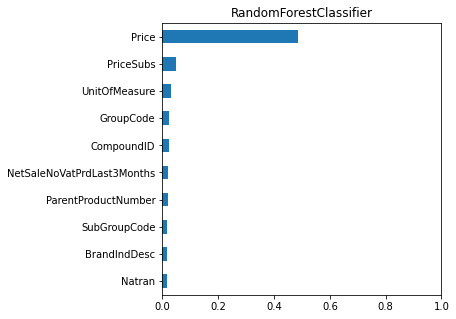

In [162]:
df_result = pd.DataFrame()

clf_RF = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=20, ccp_alpha=0.0003, random_state=73)
process_model(clf_RF, X_train, y_train, X_test, y_test, plot=True, threshold=0.015, note="n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=20, ccp_alpha=0.0003, random_state=73")

d(df_result)

#fname = prefix + f'_result_{id}.csv'
#df_result.to_csv(fname, index = True)